In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
import sys
sys.path.insert(0, '../vis/python')
import athena_read

In [11]:
from scipy.constants import c, h, k

# Convert constants from SI to cgs
c *= 1e2
h *= 1e7
k *= 1e7

def GetBnu_table(Ts, nus):
    """Computes Planck's law for a table of temperatures and frequencies
    """
    table = np.zeros((len(Ts), len(nus)))

    for i, T in enumerate(Ts):
        for j, nu in enumerate(nus):
            prefactor = 2*(k*T)**3/(h*c)**2
            u = h*nu/k/T
            if u < 0.001:  # Rayleigh--Jeans Law
                table[i][j] = prefactor*u**2
            elif u > 15:   # Wien Law
                table[i][j] = prefactor*u**3*np.exp(-u)
            else:          # Planck Law
                table[i][j] = prefactor*u**3/(np.exp(u) - 1)

    return table

[]

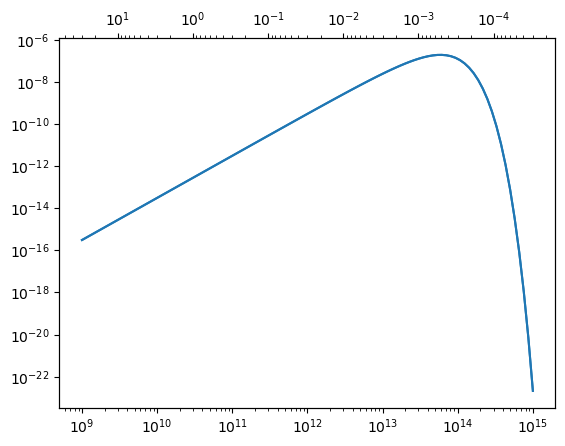

In [55]:
Ts = [1000]
nus = np.logspace(9, 15, 100)  # Frequency in Hz
plt.plot(nus, GetBnu_table(Ts, nus)[0])
plt.loglog()
plt.twiny()
plt.plot(c/nus, GetBnu_table(Ts, nus)[0])
plt.gca().invert_xaxis()
plt.loglog()

Text(0, 0.5, 'pi/2-theta (radians)')

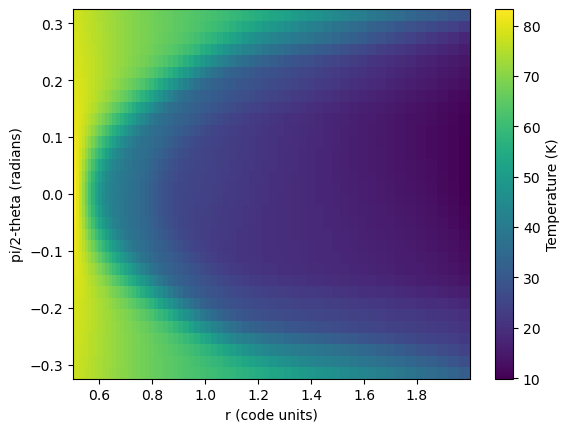

In [3]:

ishift = 10
foldername = '../2d_test_nocolort/'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3

plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'],data['temp'][0], )
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('pi/2-theta (radians)')

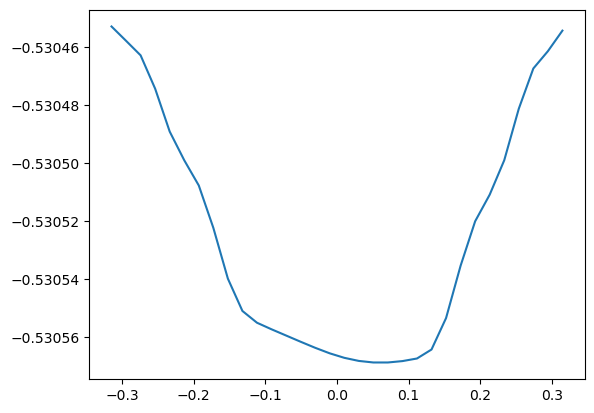

In [17]:
i = 1
plt.plot(np.pi/2.-data['x2v'], np.log10(data[f'Sigma_a_{i}'][0,:,50]/data['rho'][0,:,50]), )

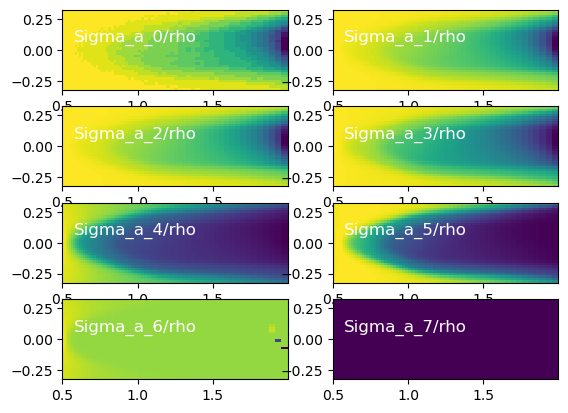

In [4]:
ishift = 4
foldername = '../2d_test_nocolort/'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3
for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'], np.log10(data[f'Sigma_a_{i}'][0]/data['rho'][0]), )
    plt.text(0.05, 0.6, f'Sigma_a_{i}/rho', transform=plt.gca().transAxes, fontsize=12, color='white')
    #plt.colorbar(label='Temperature (K)')
    #plt.xlabel('r (code units)')
    #plt.ylabel('pi/2-theta (radians)')

Text(0, 0.5, 'pi/2-theta (radians)')

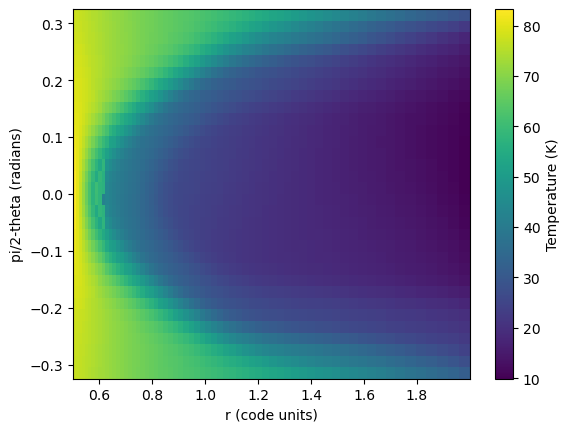

In [ ]:

ishift = 6
foldername = './'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3

plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'],data['temp'][0], )
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('pi/2-theta (radians)')

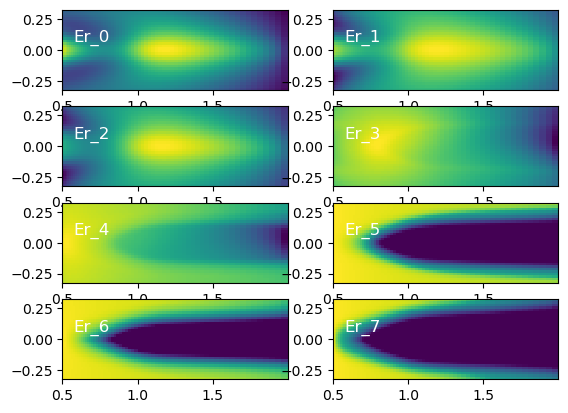

In [4]:
ishift = 4
foldername = './'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3
for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'], np.log10(data[f'Er_{i}'][0]), )
    plt.text(0.05, 0.6, f'Er_{i}', transform=plt.gca().transAxes, fontsize=12, color='white')
    #plt.colorbar(label='Temperature (K)')
    #plt.xlabel('r (code units)')
    #plt.ylabel('pi/2-theta (radians)')

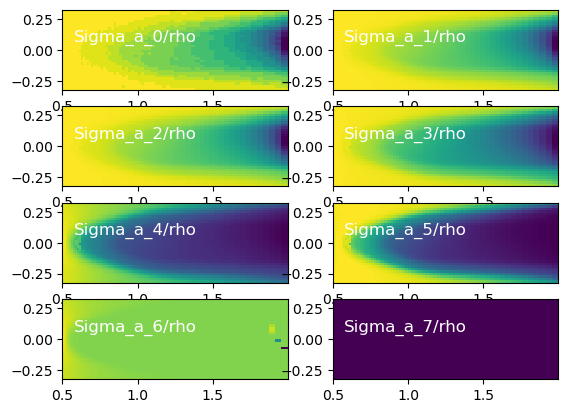

In [5]:
ishift = 4
foldername = './'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3
for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'], np.log10(data[f'Sigma_a_{i}'][0]/data['rho'][0]), )
    plt.text(0.05, 0.6, f'Sigma_a_{i}/rho', transform=plt.gca().transAxes, fontsize=12, color='white')
    #plt.colorbar(label='Temperature (K)')
    #plt.xlabel('r (code units)')
    #plt.ylabel('pi/2-theta (radians)')

Text(0, 0.5, 'pi/2-theta (radians)')

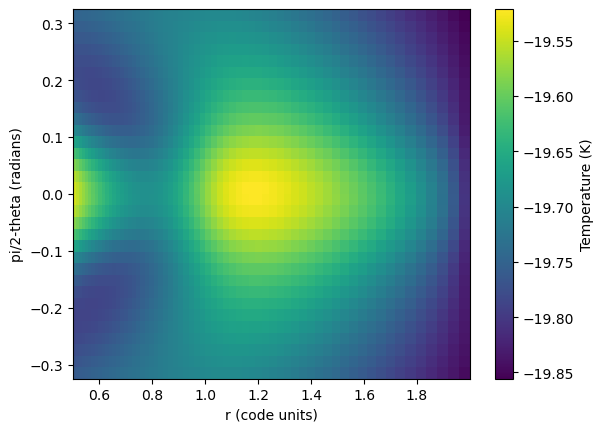

In [37]:

ishift = 6
foldername = './'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3

plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'], np.log10(data['Er_0'][0]), )
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('pi/2-theta (radians)')

In [18]:
(1.8958-np.pi/2.) / (np.pi/2.)

0.2069037644544607

In [19]:
1024 * 0.2069037644544607

211.86945480136777

In [ ]:
data['VariableNames']

array([b'rho', b'press', b'vel1', b'vel2', b'vel3', b'Er_0', b'Fr_0_1',
       b'Fr_0_2', b'Fr_0_3', b'Pr_0_11', b'Pr_0_22', b'Pr_0_33',
       b'Pr_0_12', b'Pr_0_13', b'Pr_0_23', b'Pr_0_21', b'Pr_0_31',
       b'Pr_0_32', b'Er0_0', b'Fr0_0_1', b'Fr0_0_2', b'Fr0_0_3', b'Er_1',
       b'Fr_1_1', b'Fr_1_2', b'Fr_1_3', b'Pr_1_11', b'Pr_1_22',
       b'Pr_1_33', b'Pr_1_12', b'Pr_1_13', b'Pr_1_23', b'Pr_1_21',
       b'Pr_1_31', b'Pr_1_32', b'Er0_1', b'Fr0_1_1', b'Fr0_1_2',
       b'Fr0_1_3', b'Er_2', b'Fr_2_1', b'Fr_2_2', b'Fr_2_3', b'Pr_2_11',
       b'Pr_2_22', b'Pr_2_33', b'Pr_2_12', b'Pr_2_13', b'Pr_2_23',
       b'Pr_2_21', b'Pr_2_31', b'Pr_2_32', b'Er0_2', b'Fr0_2_1',
       b'Fr0_2_2', b'Fr0_2_3', b'Er_3', b'Fr_3_1', b'Fr_3_2', b'Fr_3_3',
       b'Pr_3_11', b'Pr_3_22', b'Pr_3_33', b'Pr_3_12', b'Pr_3_13',
       b'Pr_3_23', b'Pr_3_21', b'Pr_3_31', b'Pr_3_32', b'Er0_3',
       b'Fr0_3_1', b'Fr0_3_2', b'Fr0_3_3', b'Er_4', b'Fr_4_1', b'Fr_4_2',
       b'Fr_4_3', b'Pr_4_11', b'Pr_4_22', 

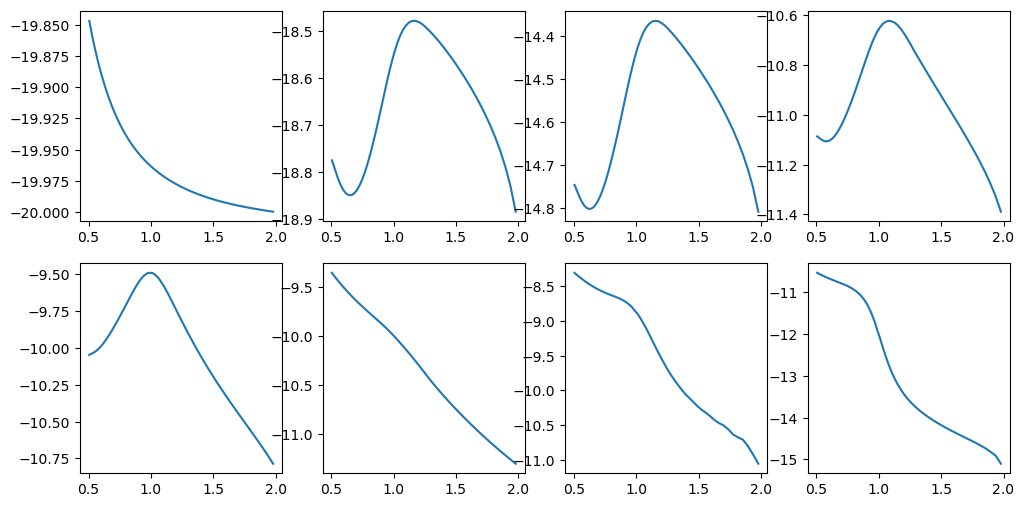

In [6]:
plt.figure(figsize=(12, 6))
for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.plot(data['x1v'], np.log10(data[f'Er_{i}'][0,10, :]),)

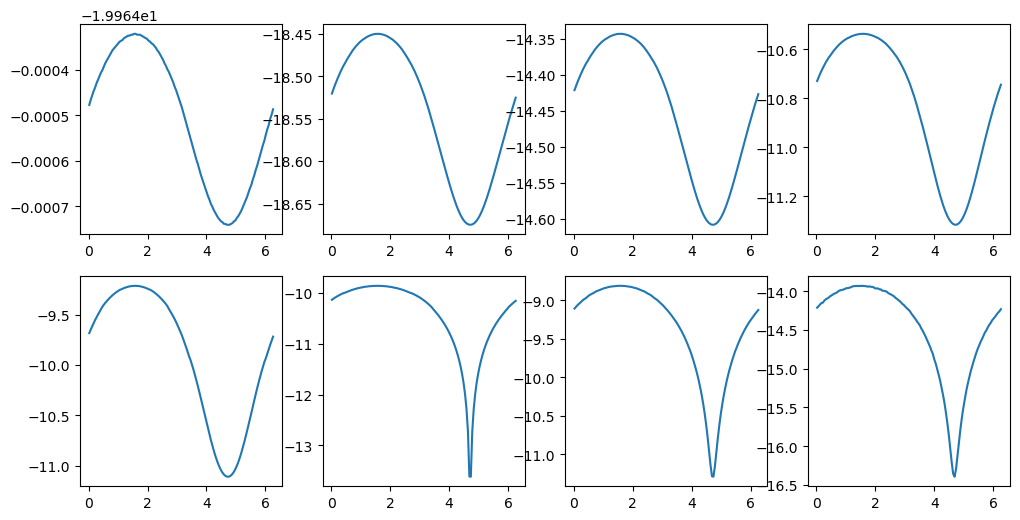

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.plot(data['x3v'], np.log10(data[f'Er_{i}'][:,15, 32]),)

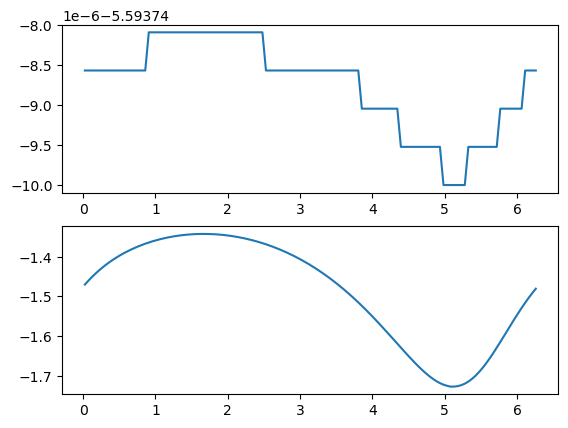

In [39]:
for i in range(2):
  plt.subplot(2, 1, i+1)
  plt.plot(data['x3v'], np.log10(data[f'Sigma_a_{i}'][:,15, 32]),)

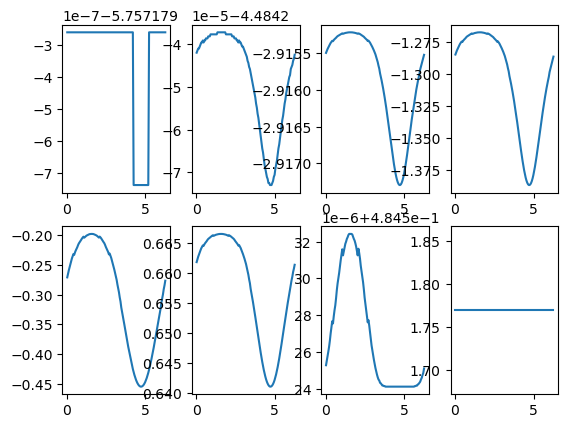

In [ ]:
for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.plot(data['x3v'], np.log10(data[f'Sigma_a_{i}'][:,15, 32]),)

Text(0, 0.5, 'phi (radians)')

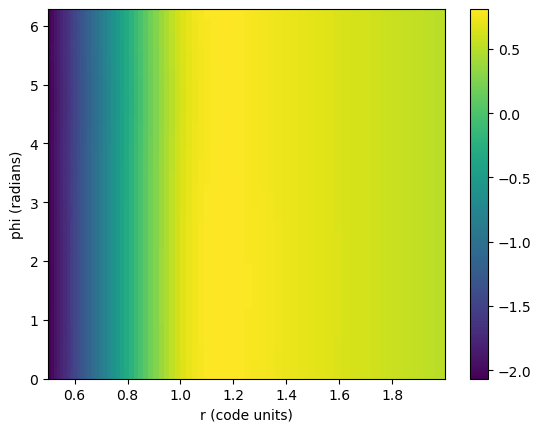

In [ ]:
plt.pcolormesh(data['x1v'], data['x3v'], np.log10(data['Sigma_a_5'][:,15,:]),)
plt.colorbar()
plt.xlabel('r (code units)')
plt.ylabel('phi (radians)')

Text(0, 0.5, 'phi (radians)')

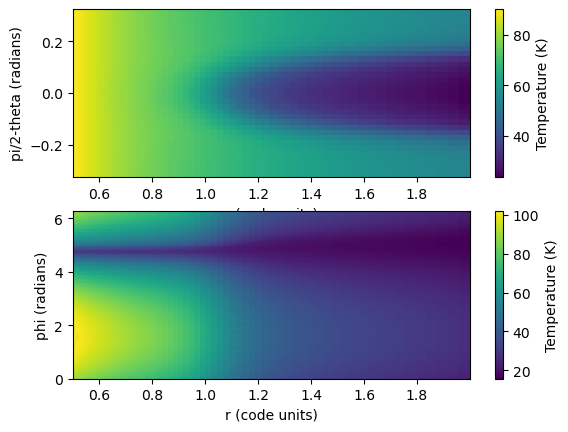

In [89]:
ishift = 100
foldername = './'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3
plt.subplot(2, 1, 1)
plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'], data['temp'][0])
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('pi/2-theta (radians)')

plt.subplot(2, 1, 2)
plt.pcolormesh(data['x1v'], data['x3v'], data['temp'][:,15,:])
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('phi (radians)')

[]

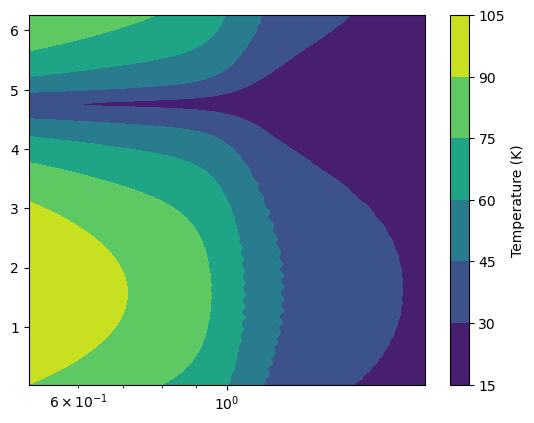

In [90]:
plt.contourf(data['x1v'], data['x3v'], data['temp'][:,15,:])
plt.colorbar(label='Temperature (K)')
plt.semilogx()

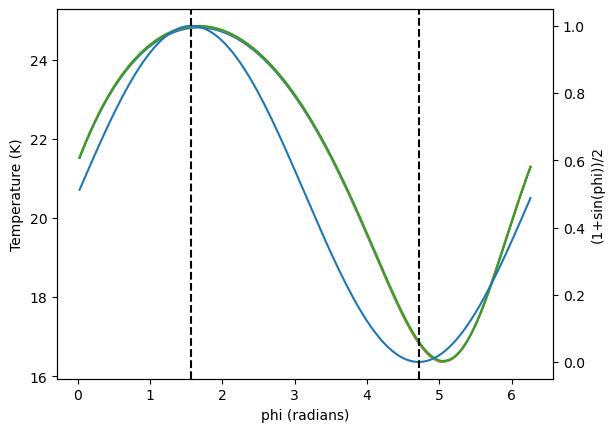

In [ ]:

#plt.plot(data['x3v'], data['temp'][:, 15, 11])
#plt.plot(data['x3v'], data['temp'][:, 15, 31])
#plt.plot(data['x3v'], data['temp'][:, 15, 60])
plt.plot(data['x3v'], data['temp'][:, 15, 40])
plt.plot(data['x3v'], data['temp'][:, 10, 40])
plt.plot(data['x3v'], data['temp'][:, 5, 40])

plt.ylabel('Temperature (K)')
plt.xlabel('phi (radians)')
plt.twinx()
plt.plot(data['x3v'], 0.5*(1.+np.sin(data['x3v'])) )
plt.ylabel('(1+sin(phi))/2')
plt.axvline(x=np.pi/2., color='k', linestyle='--')
plt.axvline(x=3.*np.pi/2., color='k', linestyle='--')

Text(0, 0.5, 'phi (radians)')

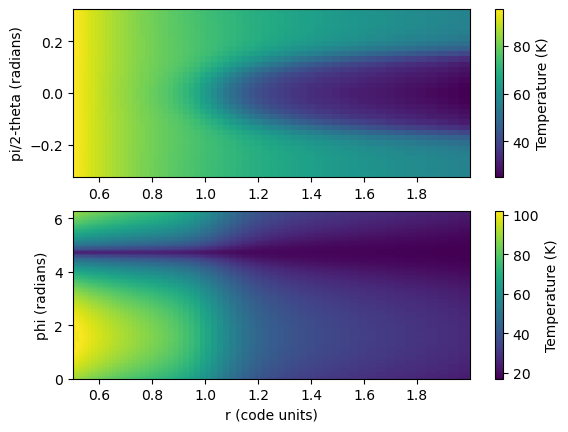

In [ ]:
:ishift = 6
foldername = './'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3
plt.subplot(2, 1, 1)
plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'], data['temp'][7])
plt.colorbar(label='Temperature (K)')
plt.ylabel('pi/2-theta (radians)')

plt.subplot(2, 1, 2)
plt.pcolormesh(data['x1v'], data['x3v'], data['temp'][:,15,:])
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('phi (radians)')

Text(0, 0.5, 'phi (radians)')

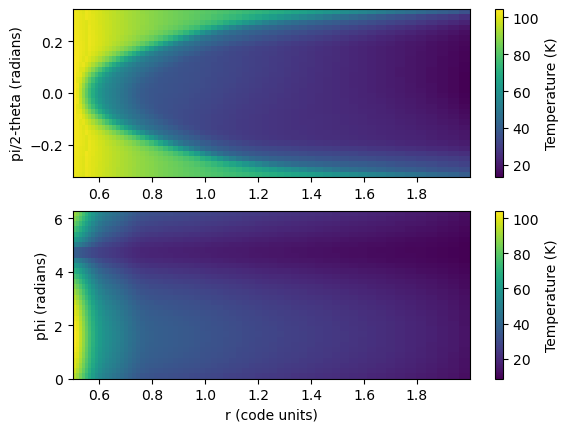

In [27]:
ishift = 6
foldername = './'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3
plt.subplot(2, 1, 1)
plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'], data['temp'][7])
plt.colorbar(label='Temperature (K)')
plt.ylabel('pi/2-theta (radians)')

plt.subplot(2, 1, 2)
plt.pcolormesh(data['x1v'], data['x3v'], data['temp'][:,15,:])
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('phi (radians)')

Text(0, 0.5, 'phi (radians)')

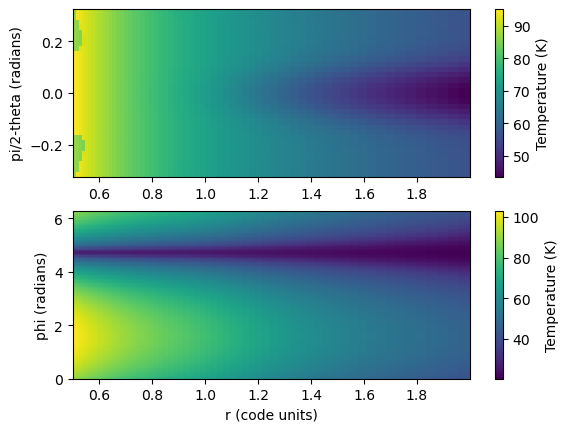

In [34]:
ishift = 6
foldername = './'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3
plt.subplot(2, 1, 1)
plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'], data['temp'][7])
plt.colorbar(label='Temperature (K)')
plt.ylabel('pi/2-theta (radians)')

plt.subplot(2, 1, 2)
plt.pcolormesh(data['x1v'], data['x3v'], data['temp'][:,15,:])
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('phi (radians)')

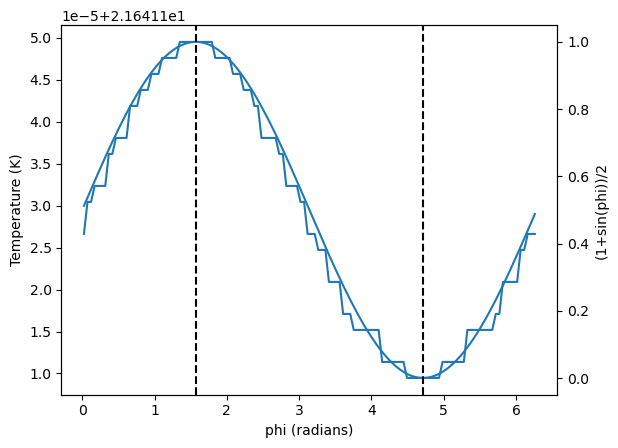

In [12]:

#plt.plot(data['x3v'], data['temp'][:, 15, 11])
#plt.plot(data['x3v'], data['temp'][:, 15, 31])
#plt.plot(data['x3v'], data['temp'][:, 15, 60])
plt.plot(data['x3v'], data['temp'][:, 15, 60])

plt.ylabel('Temperature (K)')
plt.xlabel('phi (radians)')
plt.twinx()
plt.plot(data['x3v'], 0.5*(1.+np.sin(data['x3v'])) )
plt.ylabel('(1+sin(phi))/2')
plt.axvline(x=np.pi/2., color='k', linestyle='--')
plt.axvline(x=3.*np.pi/2., color='k', linestyle='--')

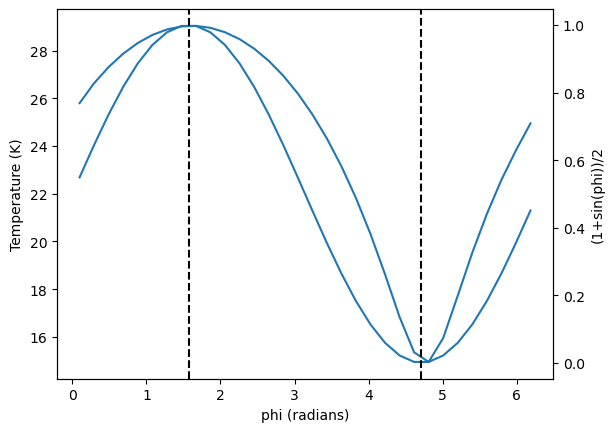

In [23]:

plt.plot(data['x3v'], data['temp'][:, 15, 60])
plt.ylabel('Temperature (K)')
plt.xlabel('phi (radians)')
plt.twinx()
plt.plot(data['x3v'], 0.5*(1.+np.sin(data['x3v'])) )
plt.ylabel('(1+sin(phi))/2')
plt.axvline(x=np.pi/2., color='k', linestyle='--')
plt.axvline(x=3.*np.pi/2., color='k', linestyle='--')

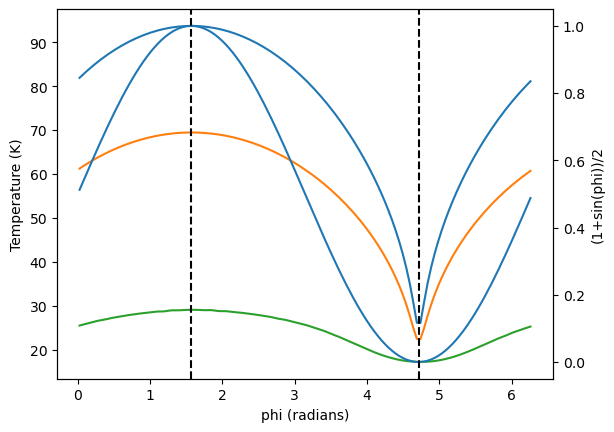

In [38]:

plt.plot(data['x3v'], data['temp'][:, 15, 11])
plt.plot(data['x3v'], data['temp'][:, 15, 31])
plt.plot(data['x3v'], data['temp'][:, 15, 60])

plt.ylabel('Temperature (K)')
plt.xlabel('phi (radians)')
plt.twinx()
plt.plot(data['x3v'], 0.5*(1.+np.sin(data['x3v'])) )
plt.ylabel('(1+sin(phi))/2')
plt.axvline(x=np.pi/2., color='k', linestyle='--')
plt.axvline(x=3.*np.pi/2., color='k', linestyle='--')